In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import KFold

In [16]:
from create_matrix import *

from tensor_custom_core import *
from create_matrix import *
from tensor_custom_core import *
from degree_days import dds
appliance_index = {appliance: APPLIANCES_ORDER.index(appliance) for appliance in APPLIANCES_ORDER}

APPLIANCES = ['fridge', 'hvac', 'wm', 'mw', 'oven', 'dw']
region = "SanDiego"
year = 2014

import os
from degree_days import dds



def un_normalize(x, maximum, minimum):
    return (maximum - minimum) * x + minimum

In [3]:
def get_tensor(df, dfc):
    start, stop = 1, 13
    energy_cols = np.array(
        [['%s_%d' % (appliance, month) for month in range(start, stop)] for appliance in APPLIANCES_ORDER]).flatten()

    static_cols = ['area', 'total_occupants', 'num_rooms']
    static_df = df[static_cols]
    static_df = static_df.div(static_df.max())
    weather_values = np.array(dds[2014][region][start - 1:stop - 1]).reshape(-1, 1)

    dfc = df.copy()

    df = dfc[energy_cols]
    col_max = df.max().max()
    col_min = df.min().min()
    # df = (1.0 * (df - col_min)) / (col_max - col_min)
    tensor = df.values.reshape((len(df), 7, stop - start))
    M, N, O = tensor.shape
    return tensor

In [6]:
sd_df, sd_dfc = create_matrix_single_region("SanDiego", year)
sd_tensor = get_tensor(sd_df, sd_dfc)
au_df, au_dfc = create_matrix_single_region('Austin', year)
au_tensor = get_tensor(au_df, au_dfc)
sd_tensor_copy = sd_tensor.copy()
au_tensor_copy = au_tensor.copy()

In [8]:
a=2
case=2
cost='abs'
H_au, A_au, T_au = learn_HAT(case, au_tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)


In [9]:
H_sd, A_sd, T_sd = learn_HAT(case, sd_tensor_copy, a, a, num_iter=2000, lr=0.1, dis=False, cost_function=cost)

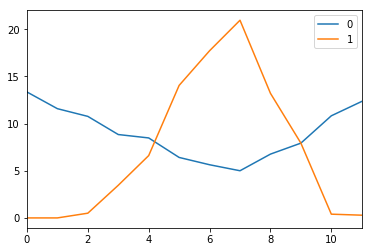

In [12]:
pd.DataFrame(T_au).plot()

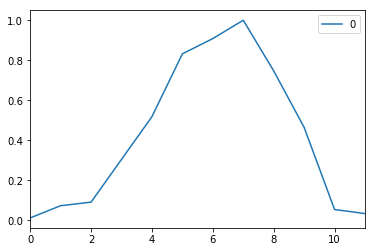

In [17]:
pd.DataFrame(dds[2014]['Austin']).plot()

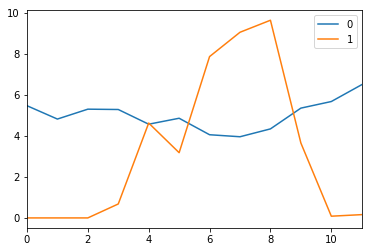

In [13]:
pd.DataFrame(T_sd).plot()

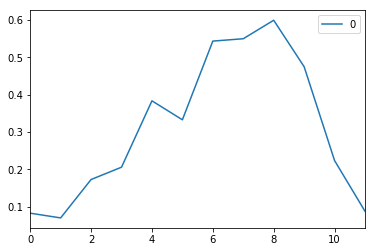

In [18]:
pd.DataFrame(dds[2014]['SanDiego']).plot()